# 短期第三次实习

    计算太平洋西部型（WP）遥相关指数，输出1月份该指数年际变化的时间序列；
    计算太平洋西部型（WP）遥相关指数与同期环流场（500hPa高度场或海平面气压场）的相关系数；
    计算太平洋西部型（WP）遥相关指数与同期北半球气温的相关系数。

## 导入库，读取数据

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.ticker import MultipleLocator
from cartopy.util import add_cyclic_point

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 防止无法显示中文并设置黑体
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [3]:
ds = xr.open_dataset(r'E:\work\python\short_climate\exp2\hgt.mon.mean.nc')['hgt']
dt = xr.open_dataset(r'E:\work\python\short_climate\exp3-4\air.mon.mean.nc')['air']
ds

<xarray.DataArray 'hgt' (time: 513, level: 17, lat: 73, lon: 144)>
[91675152 values with dtype=float32]
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-09-01
Attributes:
    long_name:      Monthly Geopotential Heights on Pressure Levels
    units:          m
    precision:      0
    GRIB_id:        7
    GRIB_name:      HGT
    var_desc:       Geopotential height
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     Pressure Levels
    statistic:      Individual Obs
    parent_stat:    Other
    standard_name:  geopotential_height
    cell_methods:   time: mean (montly from 6-hourly values)
    valid_range:    [-1500. 35800.]
    actual_range:   [ -347. 32301.]

In [4]:
def drawmap():
    proj = ccrs.PlateCarree()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.subplots(1, 1, subplot_kw={'projection': proj})
    # 海岸线
    ax.coastlines('110m')
    # 标注坐标轴
    majorticks = MultipleLocator(30)
    ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
                 linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
    return ax, fig

## 1.计算太平洋西部型（WP）遥相关指数

In [5]:
# 读取数据
wp1 = ds.loc[ds.time.dt.month.isin([1])].loc['1981':'2018', 500, 60, 155]
wp2 = ds.loc[ds.time.dt.month.isin([1])].loc['1981':'2018', 500, 30, 155]

In [6]:
wp1

<xarray.DataArray 'hgt' (time: 38)>
array([5071., 5098., 5157., 5219., 5134., 5138., 5071., 5032., 5051., 5070.,
       5274., 5055., 5121., 5107., 5147., 5191., 5251., 5179., 5175., 5167.,
       5071., 5173., 5135., 5206., 5167., 5194., 5101., 5083., 5235., 5151.,
       5158., 5213., 5184., 5084., 5232., 5097., 5162., 5172.], dtype=float32)
Coordinates:
    level    float32 500.0
    lat      float32 60.0
    lon      float32 155.0
  * time     (time) datetime64[ns] 1981-01-01 1982-01-01 ... 2018-01-01
Attributes:
    long_name:      Monthly Geopotential Heights on Pressure Levels
    units:          m
    precision:      0
    GRIB_id:        7
    GRIB_name:      HGT
    var_desc:       Geopotential height
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     Pressure Levels
    statistic:      Individual Obs
    parent_stat:    Other
    standard_name:  geopotential_height
    cell_methods:   time: mean (montly from 6-hourly values)
    valid_range:    [-1500. 35800.]
    actual_range:   [ -347. 32301.]

In [7]:
wp2

<xarray.DataArray 'hgt' (time: 38)>
array([5611., 5669., 5695., 5608., 5654., 5671., 5699., 5753., 5737., 5707.,
       5630., 5720., 5729., 5689., 5651., 5651., 5622., 5708., 5659., 5694.,
       5678., 5680., 5683., 5634., 5667., 5646., 5735., 5681., 5702., 5655.,
       5607., 5615., 5638., 5672., 5657., 5736., 5614., 5679.], dtype=float32)
Coordinates:
    level    float32 500.0
    lat      float32 30.0
    lon      float32 155.0
  * time     (time) datetime64[ns] 1981-01-01 1982-01-01 ... 2018-01-01
Attributes:
    long_name:      Monthly Geopotential Heights on Pressure Levels
    units:          m
    precision:      0
    GRIB_id:        7
    GRIB_name:      HGT
    var_desc:       Geopotential height
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     Pressure Levels
    statistic:      Individual Obs
    parent_stat:    Other
    standard_name:  geopotential_height
    cell_methods:   time: mean (montly from 6-hourly values)
    valid_range:    [-1500. 35800.]
    actual_range:   [ -347. 32301.]

In [8]:
wp =(wp1 - wp2)/2    # 计算wp
wp_standard = (wp - wp.mean())/wp.std()    # 标准化处理
wp_standard

<xarray.DataArray 'hgt' (time: 38)>
array([-0.15120279, -0.50045082, -0.12867066,  1.54997314,  0.07411853,
       -0.07234033, -1.14261657, -2.19036069, -1.79604838, -1.24401116,
        1.92175331, -1.559461  , -0.91729526, -0.62437755,  0.25437558,
        0.75008247,  1.75276232, -0.02727606,  0.47969689, -0.00474393,
       -0.90602919,  0.22057738, -0.24133131,  1.11059658,  0.29943984,
        0.840211  , -1.21021297, -0.8046346 ,  0.67122001,  0.25437558,
        0.8740092 ,  1.40351429,  0.81767887, -0.69197394,  1.14439477,
       -1.2665433 ,  0.840211  ,  0.22057738])
Coordinates:
    level    float32 500.0
    lon      float32 155.0
  * time     (time) datetime64[ns] 1981-01-01 1982-01-01 ... 2018-01-01

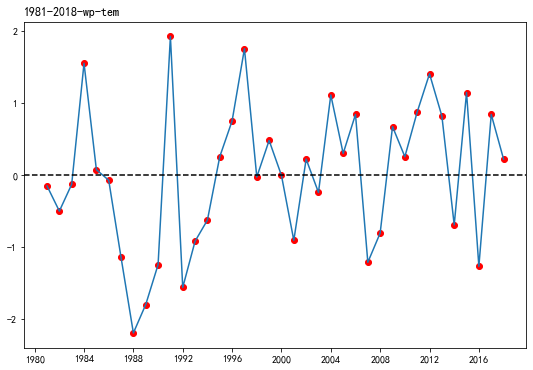

In [9]:
fig = plt.figure(figsize=(9, 6))
ax = fig.subplots(1, 1)
ax.plot(wp_standard['time'].data, wp_standard)
ax.scatter(wp_standard['time'].data, wp_standard, color='r')
ax.set_title('1981-2018-wp-tem', loc='left')
ax.axhline(y=0, linestyle='--', color='k')
plt.savefig(r'E:\Work\Python\short_climate\exp3-4\1981-2018-wp-tem.jpg')
plt.show()

## 2.计算太平洋西部型（WP）遥相关指数与同期环流场的相关系数；

In [10]:
def relate(wp, data, height):
    wp_ave = np.mean(wp)
    wpstand = wp - wp_ave
    fieldstand = data.loc[:, height, :, :] - data.loc[:, height, :, :].mean(dim='time')
    nume = np.sum(wpstand*fieldstand, axis=0)
    deno = (np.sqrt(np.sum(wpstand**2))*np.sqrt(np.sum(fieldstand**2, axis=0)))
    r = nume/deno
    return r

In [11]:
hgt = ds.loc[ds.time.dt.month.isin([1])].loc['1981':'2018', :, :, :]
temp = dt.loc[dt.time.dt.month.isin([1])].loc['1981':'2018', :, :, :]
hgt

<xarray.DataArray 'hgt' (time: 38, level: 17, lat: 73, lon: 144)>
[6790752 values with dtype=float32]
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1981-01-01 1982-01-01 ... 2018-01-01
Attributes:
    long_name:      Monthly Geopotential Heights on Pressure Levels
    units:          m
    precision:      0
    GRIB_id:        7
    GRIB_name:      HGT
    var_desc:       Geopotential height
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     Pressure Levels
    statistic:      Individual Obs
    parent_stat:    Other
    standard_name:  geopotential_height
    cell_methods:   time: mean (montly from 6-hourly values)
    valid_range:    [-1500. 35800.]
    actual_range:   [ -347. 32301.]

In [12]:
rh_500hPa = relate(wp, hgt, 500)
rh_500hPa

<xarray.DataArray 'hgt' (lat: 73, lon: 144)>
array([[ 0.09546737,  0.09546737,  0.09546737, ...,  0.09546737,
         0.09546737,  0.09546737],
       [ 0.11383943,  0.11569786,  0.11738367, ...,  0.11143486,
         0.11231808,  0.11404119],
       [ 0.12955154,  0.13107274,  0.13282079, ...,  0.1244135 ,
         0.12632212,  0.12681516],
       ...,
       [-0.10159364, -0.09906642, -0.09615367, ..., -0.11192649,
        -0.10979946, -0.10711469],
       [-0.10397822, -0.10024208, -0.09767716, ..., -0.11078374,
        -0.10862784, -0.10392842],
       [-0.12145521, -0.12145521, -0.12145521, ..., -0.12145521,
        -0.12145521, -0.12145521]], dtype=float32)
Coordinates:
    level    float32 500.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0

In [13]:
rh_1000hPa = relate(wp, hgt, 1000)
rh_1000hPa

<xarray.DataArray 'hgt' (lat: 73, lon: 144)>
array([[ 0.05675336,  0.05675336,  0.05675336, ...,  0.05675336,
         0.05675336,  0.05675336],
       [ 0.05973065,  0.06132113,  0.06181198, ...,  0.06242106,
         0.06030109,  0.06231933],
       [ 0.05963101,  0.05774128,  0.05757195, ...,  0.06125862,
         0.05743231,  0.0588608 ],
       ...,
       [-0.16562037, -0.16196488, -0.16434817, ..., -0.1735245 ,
        -0.16824579, -0.16489184],
       [-0.14661598, -0.14991017, -0.14737307, ..., -0.15284252,
        -0.15186913, -0.14704017],
       [-0.13985153, -0.13985153, -0.13985153, ..., -0.13985153,
        -0.13985153, -0.13985153]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0

In [14]:
lon = ds['lon'].data
lat = ds['lat'].data
# 填充白条
rh_500_use, lon1 = add_cyclic_point(rh_500hPa, coord=lon)
rh_1000_use, lon1 = add_cyclic_point(rh_1000hPa, coord=lon)

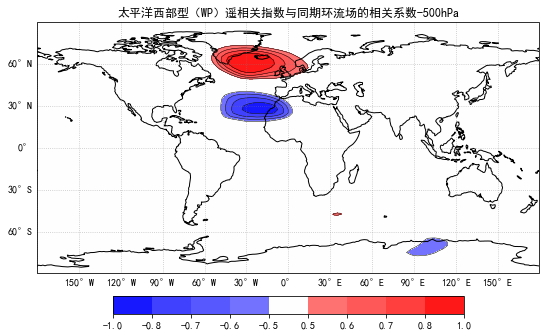

In [15]:
ax1, fig1 = drawmap()
line = ax1.contour(lon1, lat, rh_500_use, 
                   levels=[-1, -0.8, -0.7, -0.6, -0.5, 0.5, 0.6, 0.7, 0.8, 1], 
                   colors='k', 
                   linewidths=0.5, 
                   linestyles='solid', 
                   transform=ccrs.PlateCarree(central_longitude=180))
shaded = ax1.contourf(lon1, lat, rh_500_use, 
                      levels=[-1, -0.8, -0.7, -0.6, -0.5, 0.5, 0.6, 0.7, 0.8, 1], 
                      cmap='bwr', 
                      transform=ccrs.PlateCarree(central_longitude=180))
cb=fig1.colorbar(shaded, extendrect='True', pad=0.03, fraction=0.1, shrink=0.7, location='bottom', panchor=(0.4, 0.4))
ax1.set_title('太平洋西部型（WP）遥相关指数与同期环流场的相关系数-500hPa')
plt.savefig(r'E:\Work\Python\short_climate\exp3-4\rh-500hPa.jpg')
plt.show()

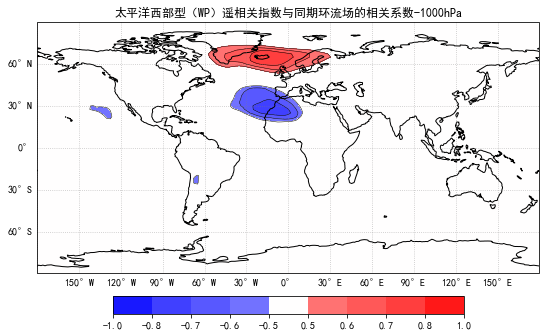

In [16]:
ax2, fig2 = drawmap()
line = ax2.contour(lon1, lat, rh_1000_use, 
                   levels=[-1, -0.8, -0.7, -0.6, -0.5, 0.5, 0.6, 0.7, 0.8, 1], 
                   colors='k', 
                   linewidths=0.5, 
                   linestyles='solid', 
                   transform=ccrs.PlateCarree(central_longitude=180))
shaded = ax2.contourf(lon1, lat, rh_1000_use, 
                      levels=[-1, -0.8, -0.7, -0.6, -0.5, 0.5, 0.6, 0.7, 0.8, 1], 
                      cmap='bwr', 
                      transform=ccrs.PlateCarree(central_longitude=180))
cb=fig2.colorbar(shaded, extendrect='True', pad=0.03, fraction=0.1, shrink=0.7, location='bottom', panchor=(0.4, 0.4))
ax2.set_title('太平洋西部型（WP）遥相关指数与同期环流场的相关系数-1000hPa')
plt.savefig(r'E:\Work\Python\short_climate\exp3-4\rh-1000hPa.jpg')
plt.show()

## 3.计算太平洋西部型（WP）遥相关指数与同期北半球气温的相关系数。

In [17]:
rt_500hPa = relate(wp, temp, 500)
rt_1000hPa = relate(wp, temp, 1000)

In [18]:
lon = dt['lon'].data
lat = dt['lat'].data
rt_500_use, lon2 = add_cyclic_point(rt_500hPa, coord=lon)
rt_1000_use, lon2 = add_cyclic_point(rt_1000hPa, coord=lon)

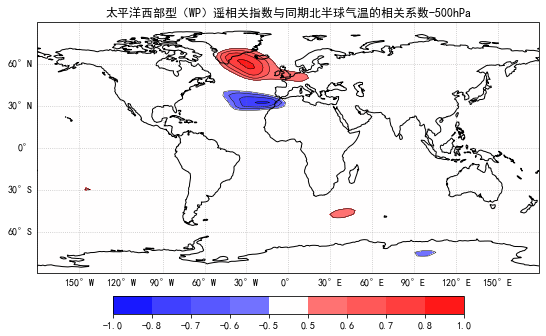

In [19]:
ax3, fig3 = drawmap()
line = ax3.contour(lon2, lat, rt_500_use, 
                   levels=[-1, -0.8, -0.7, -0.6, -0.5, 0.5, 0.6, 0.7, 0.8, 1], 
                   colors='k', 
                   linewidths=0.5, 
                   linestyles='solid', 
                   transform=ccrs.PlateCarree(central_longitude=180))
shaded = ax3.contourf(lon2, lat, rt_500_use, 
                      levels=[-1, -0.8, -0.7, -0.6, -0.5, 0.5, 0.6, 0.7, 0.8, 1], 
                      cmap='bwr', 
                      transform=ccrs.PlateCarree(central_longitude=180))
cb=fig3.colorbar(shaded, extendrect='True', pad=0.03, fraction=0.1, shrink=0.7, location='bottom', panchor=(0.4, 0.4))
ax3.set_title('太平洋西部型（WP）遥相关指数与同期北半球气温的相关系数-500hPa')
plt.savefig(r'E:\Work\Python\short_climate\exp3-4\rt-500hPa.jpg')
plt.show()

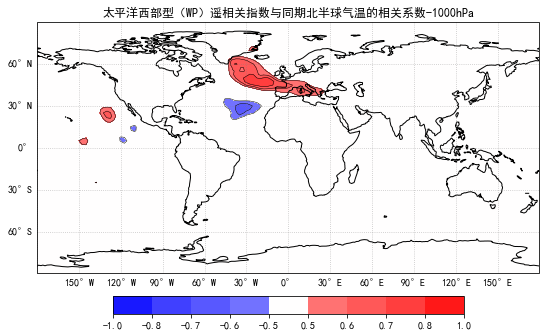

In [20]:
ax4, fig4 = drawmap()
line = ax4.contour(lon2, lat, rt_1000_use, 
                   levels=[-1, -0.8, -0.7, -0.6, -0.5, 0.5, 0.6, 0.7, 0.8, 1], 
                   colors='k', 
                   linewidths=0.5, 
                   linestyles='solid', 
                   transform=ccrs.PlateCarree(central_longitude=180))
shaded = ax4.contourf(lon2, lat, rt_1000_use, 
                      levels=[-1, -0.8, -0.7, -0.6, -0.5, 0.5, 0.6, 0.7, 0.8, 1], 
                      cmap='bwr', 
                      transform=ccrs.PlateCarree(central_longitude=180))
cb=fig4.colorbar(shaded, extendrect='True', pad=0.03, fraction=0.1, shrink=0.7, location='bottom', panchor=(0.4, 0.4))
ax4.set_title('太平洋西部型（WP）遥相关指数与同期北半球气温的相关系数-1000hPa')
plt.savefig(r'E:\Work\Python\short_climate\exp3-4\rt-1000hPa.jpg')
plt.show()